In [8]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import steepest_descent_bcktrck as sdb
from steepest_descent_bcktrck import *
import cgm_pol_rib as cgmpb
from cgm_pol_rib import *
import functions as funcs
from sklearn.model_selection import ParameterGrid
from importlib import reload

In [2]:
reload(funcs)
reload(sdb)
reload(cgmpb)

<module 'cgm_pol_rib' from 'c:\\Users\\bruno\\Documents\\GitHub\\Homework-Numerical-Optimisation-\\Homework Numerical Optimisation\\Unconstrained Optimisation\\cgm_pol_rib.py'>

Evaluate rate of convergence

In [3]:
def rate_of_convergence(x_seq: np.ndarray) ->np.ndarray:
    N = 100
    n = x_seq.shape[1]
    p = np.empty(N)
    for k in range(1, N+1):
        if (x_seq[k+2, :] - x_seq[k+1, :]).any() != 0 and (x_seq[k+1, :] - x_seq[k, :]).any() != 0 and (x_seq[k, :] - x_seq[k-1, :]).any() != 0:
            p[k-1] = log(np.linalg.norm(x_seq[k+2, :] - x_seq[k+1, :], 2) / (np.linalg.norm(x_seq[k+1, :] - x_seq[k, :], 2))) / \
                     log(np.linalg.norm(x_seq[k+1, :] - x_seq[k, :], 2) / (np.linalg.norm(x_seq[k, :] - x_seq[k-1, :], 2)))
            # print(f"i = {k-1}: p = {p}")
    return p

Initialisation of the data

In [4]:
x0 = np.array([1.2, 1.2])
x1 = np.array([-1.2, 1])
alpha0 = 1
tolgrad = 1e-12
rho = 0.5
c = 1e-4
kmax = 5000
btmax = 50
fin_diff = False
fd_type = 'centered'

params = {"c": [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
              "rho": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}

Let's test the Steepest descent and conjugate gradient method with Backtrack tuning the parameters c and rho using the Armijo condition to see what is the result obtained (POINT X0)

Here our idea is quite simple. In order to make a complete comparison between the two methods the best set of paramenters for both methods is evaluated, once this is done a comparison is made with the best result obtained in one of the two methods with one set and the same set is also used for the other method (we will therefore have in all 2 saved evaluations for steepest descent, one with the best set of parameters, and the other with the best set of parameters of the conjugate gradient method, and 2 saved evaluations for the conjugate gradient method) 


In [ ]:
#best result for steepest descent method is saved here
sd_best_fk_x0 = 1
sd_best_param_x0 = 0
sd_best_k_x0 = 0
sd_best_gradfk_norm_x0 = 10
sd_best_xk_x0 = np.empty(2)

#best result for conjugate gradient method is saved here
cg_best_fk_x0 = 1
cg_best_param_x0 = 0
cg_best_k_x0 = 0
cg_best_gradfk_norm_x0 = 10
cg_best_xk_x0 = np.empty(2)

#Other result of steepest descent method is saved here
sd_fk_x0 = 1
sd_param_x0 = 0
sd_k_x0 = 0
sd_xk_x0 = np.empty(2)

#Other result of conjugate gradient method is saved here
cg_fk_x0 = 1
cg_param_x0 = 0
cg_k_x0 = 0
cg__xk_x0 = np.empty(2)

for param in ParameterGrid(params): 
    sd_xk, sd_fk, sd_gradfk_norm, sd_k, sd_x_seq, sd_bt_seq = steepest_descent_bcktrck(x0, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)

    cg_xk, cg_fk, cg_gradfk_norm, cg_k, cg_x_seq, cg_bt_seq = cgm_pol_rib(x0, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)
    
    if (sd_fk < sd_best_fk_x0): 
        sd_best_param_x0 = param

        sd_best_xk_x0 = sd_xk
        sd_best_k_x0 = sd_k
        sd_best_fk_x0 = sd_fk
        sd_best_gradfk_norm_x0 = sd_gradfk_norm
        sd_best_x_seq_x0 = np.copy(sd_x_seq)
        
        cg_xk_x0 = cg_xk
        cg_k_x0 = cg_k
        cg_fk_x0 = cg_fk
            
    if (cg_fk < cg_best_fk_x0): 
        cg_best_param_x0 = param

        cg_best_xk_x0 = cg_xk
        cg_best_k_x0 = cg_k
        cg_best_fk_x0 = cg_fk
        cg_best_gradfk_norm_x0 = cg_gradfk_norm
        cg_best_x_seq_x0 = np.copy(cg_x_seq)

        
        sd_xk_x0 = sd_xk
        sd_k_x0 = sd_k
        sd_fk_x0 = sd_fk

In [ ]:
print("Best evaluation with steepest descent method:")
print("x0: ", x0[0], x0[1])
print("best set of parameters: ", sd_best_param_x0)
print("xk: ", sd_best_xk_x0[0], sd_best_xk_x0[1])
print("k: ", sd_best_k_x0)
print("fk: ", sd_best_fk_x0) 

print("\nEvaluation of the conjugate gradient method using the best parameters of steepest descent: ")
print("x0: ", x0[0], x0[1])
print("set of parameters: ", sd_best_param_x0)
print("xk: ", cg_xk_x0[0], cg_xk_x0[1])
print("k: ", cg_k_x0)
print("fk: ", cg_fk_x0) 

Best evaluation with steepest descent method:

x0:  [1.2] [1.2]

best set of parameters:  {'c': 0.01, 'rho': 0.7}

xk:  [1.] [1.]

k:  31839

fk:  [4.17569518e-25]


Evaluation of the conjugate gradient method using the best parameters of steepest descent: 

x0:  [1.2] [1.2]

set of parameters:  {'c': 0.01, 'rho': 0.7}

xk:  [1.] [1.]

k:  8589

fk:  [3.1537594e-25]

In [ ]:
print("Best evaluation with conjugate gradient method:")
print("x0: ", x0[0], x0[1])
print("best set of parameters: ", cg_best_param_x0)
print("xk: ", cg_best_xk_x0[0], cg_best_xk_x0[1])
print("k: ", cg_best_k_x0)
print("fk: ", cg_best_fk_x0) 

print("\nEvaluation of the steepest descent method using the best parameters of conjugate gradient: ")
print("x0: ", x0[0], x0[1])
print("set of parameters: ", cg_best_param_x0)
print("xk: ", sd_xk_x0[0], sd_xk_x0[1])
print("k: ", sd_k_x0)
print("fk: ", sd_fk_x0) 


Best evaluation with conjugate gradient method:

x0:  [1.2] [1.2]

best set of parameters:  {'c': 0.1, 'rho': 0.4}

xk:  [1.] [1.]

k:  330

fk:  [8.72184338e-29]

Evaluation of the steepest descent method using the best parameters of conjugate gradient: 

x0:  [1.2] [1.2]

set of parameters:  {'c': 0.1, 'rho': 0.4}

xk:  [1.] [1.]

k:  27922

fk:  [8.37329555e-25]

In [ ]:
if (sd_best_gradfk_norm_x0 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(sd_best_x_seq_x0)
    print("Evaluation of rate of convergence for steepest descent method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for steepest descent method:

p mean = 1.13

In [ ]:
if (cg_best_gradfk_norm_x0 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(cg_best_x_seq_x0)
    print("Evaluation of rate of convergence for conjugate gradient method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for conjugate gradient method:

p mean = 3.78

Now let's do the same but using another starting point (x1)

In [ ]:
#best result for steepest descent method is saved here
sd_best_fk_x1 = 1
sd_best_param_x1 = 0
sd_best_k_x1 = 0
sd_best_gradfk_norm_x1 = 10
sd_best_xk_x1 = np.empty(2)

#best result for conjugate gradient method is saved here
cg_best_fk_x1 = 1
cg_best_param_x1 = 0
cg_best_k_x1 = 0
cg_best_gradfk_norm_x1 = 10
cg_best_xk_x1 = np.empty(2)

#Other result of steepest descent method is saved here
sd_fk_x1 = 1
sd_param_x1 = 0
sd_k_x1 = 0
sd_xk_x1 = np.empty(2)

#Other result of conjugate gradient method is saved here
cg_fk_x1 = 1
cg_param_x1 = 0
cg_k_x1 = 0
cg__xk_x1 = np.empty(2)

for param in ParameterGrid(params): 
    sd_xk, sd_fk, sd_gradfk_norm, sd_k, sd_x_seq, sd_bt_seq = steepest_descent_bcktrck(x1, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)

    cg_xk, cg_fk, cg_gradfk_norm, cg_k, cg_x_seq, cg_bt_seq = cgm_pol_rib(x1, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)
    
    if (sd_fk < sd_best_fk_x0): 
        sd_best_param_x1 = param

        sd_best_xk_x1 = sd_xk
        sd_best_k_x1 = sd_k
        sd_best_fk_x1 = sd_fk
        sd_best_gradfk_norm_x1 = sd_gradfk_norm
        sd_best_x_seq_x1 = np.copy(sd_x_seq)
        
        cg_xk_x1 = cg_xk
        cg_k_x1 = cg_k
        cg_fk_x1 = cg_fk
            
    if (cg_fk < cg_best_fk_x1): 
        cg_best_param_x1 = param

        cg_best_xk_x1 = cg_xk
        cg_best_k_x1 = cg_k
        cg_best_fk_x1 = cg_fk
        cg_best_gradfk_norm_x1 = cg_gradfk_norm
        cg_best_x_seq_x1 = np.copy(cg_x_seq)

        
        sd_xk_x1 = sd_xk
        sd_k_x1 = sd_k
        sd_fk_x1 = sd_fk

In [ ]:
print("Best evaluation with steepest descent method:")
print("x1: ", x1[0], x1[1])
print("best set of parameters: ", sd_best_param_x1)
print("xk: ", sd_best_xk_x1[0], sd_best_xk_x1[1])
print("k: ", sd_best_k_x1)
print("fk: ", sd_best_fk_x1) 

print("\nEvaluation of the conjugate gradient method using the best parameters of steepest descent: ")
print("x1: ", x1[0], x1[1])
print("set of parameters: ", sd_best_param_x1)
print("xk: ", cg_xk_x1[0], cg_xk_x1[1])
print("k: ", cg_k_x1)
print("fk: ", cg_fk_x1) 

Best evaluation with steepest descent method:

x1:  [-1.2] [1.]

best set of parameters:  {'c': 1e-06, 'rho': 0.7}

xk:  [1.] [1.]

k:  35285

fk:  [4.17283211e-25]


Evaluation of the conjugate gradient method using the best parameters of steepest descent: 

x1:  [-1.2] [1.]

set of parameters:  {'c': 1e-06, 'rho': 0.7}

xk:  [1.] [1.]

k:  8191

fk:  [2.04761125e-25]

In [ ]:
print("Best evaluation with conjugate gradient method:")
print("x1: ", x1[0], x1[1])
print("best set of parameters: ", cg_best_param_x1)
print("xk: ", cg_best_xk_x1[0], cg_best_xk_x1[1])
print("k: ", cg_best_k_x1)
print("fk: ", cg_best_fk_x1) 

print("\nEvaluation of the steepest descent method using the best parameters of conjugate gradient: ")
print("x1: ", x1[0], x1[1])
print("set of parameters: ", cg_best_param_x1)
print("xk: ", sd_xk_x1[0], sd_xk_x1[1])
print("k: ", sd_k_x1)
print("fk: ", sd_fk_x1) 


Best evaluation with conjugate gradient method:

x1:  [-1.2] [1.]

best set of parameters:  {'c': 0.01, 'rho': 0.4}

xk:  [1.] [1.]

k:  318

fk:  [5.77643398e-28]


Evaluation of the steepest descent method using the best parameters of conjugate gradient: 

x1:  [-1.2] [1.]

set of parameters:  {'c': 0.01, 'rho': 0.4}

xk:  [1.] [1.]

k:  28146

fk:  [8.1509053e-25]

In [ ]:
if (sd_best_gradfk_norm_x1 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(sd_best_x_seq_x1)
    print("Evaluation of rate of convergence for steepest descent method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for steepest descent method:

p mean = 1.30

In [ ]:
if (cg_best_gradfk_norm_x1 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(cg_best_x_seq_x1)
    print("Evaluation of rate of convergence for conjugate gradient method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for conjugate gradient method:

p mean = 2.18

Now let's work with the other functions and collect the data. 

1. Extended Powell

In [15]:
kmax = 5000
x0_array = np.random.randint(1, 10, size=(10, 8))

In [16]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    sd_xk_ep, sd_fk_ep, sd_gradfk_norm_ep, sd_k_ep, sd_x_seq_ep, sd_bt_seq_ep = steepest_descent_bcktrck(point, 'Extended Powell', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", sd_k_ep)
    print("fk: ", sd_fk_ep[-1]) 
    print("gradfk: ", sd_gradfk_norm_ep[-1])
    print("\n")

    kmean += sd_k_ep
    grad_norm_mean += sd_gradfk_norm_ep[-1]
    if grad_norm_max < sd_gradfk_norm_ep[-1]: 
        grad_norm_max = sd_gradfk_norm_ep[-1]
    if grad_norm_min > sd_gradfk_norm_ep[-1]: 
        grad_norm_min = sd_gradfk_norm_ep[-1]
    fx_mean += sd_fk_ep[-1]
    if fx_max < sd_fk_ep[-1]: 
        fx_max = sd_fk_ep[-1]
    if fx_min > sd_fk_ep[-1]: 
        fx_min = sd_fk_ep[-1]
    

Result of steepest descent method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  5000
fk:  4.842325257754082e-06
gradfk:  0.0003951983331178306


Result of steepest descent method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  4.759551178805955e-06
gradfk:  0.0007785637811320282


Result of steepest descent method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  5000
fk:  4.811901385113257e-06
gradfk:  0.0004135841396571141


Result of steepest descent method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  4.819878354615375e-06
gradfk:  0.0008396623909494702


Result of steepest descent method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  4.824865177102217e-06
gradfk:  0.0005234839833472004


Result of steepest descent method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  5000
fk:  4.8454395805924075e-06
gradfk:  0.00038601353296060446


Result of steepest descent method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  4.8187857599651306e-06
gradfk:  0.00040929821484085073


Re

In [17]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  5000.0


min_of_grad_norm:  0.00034104185306614565
mean_of_grad_norm:  0.0004972385061823958
max_of_grad_norm:  0.0008396623909494702


min_of_fx:  4.759551178805955e-06
mean_of_fx:  4.820834040037819e-06
max_of_fx:  4.8471807702883015e-06


In [18]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    cg_xk_ep, cg_fk_ep, cg_gradfk_norm_ep, cg_k_ep, cg_x_seq_ep, cg_bt_seq_ep = cgm_pol_rib(point, 'Extended Powell', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of conjugate gradient method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", cg_k_ep)
    print("fk: ", cg_fk_ep[-1]) 
    print("gradfk: ", cg_gradfk_norm_ep[-1])
    print("\n")
    
    kmean += cg_k_ep
    grad_norm_mean += cg_gradfk_norm_ep[-1]
    if grad_norm_max < cg_gradfk_norm_ep[-1]: 
        grad_norm_max = cg_gradfk_norm_ep[-1]
    if grad_norm_min > cg_gradfk_norm_ep[-1]: 
        grad_norm_min = cg_gradfk_norm_ep[-1]
    fx_mean += cg_fk_ep[-1]
    if fx_max < cg_fk_ep[-1]: 
        fx_max = cg_fk_ep[-1]
    if fx_min > cg_fk_ep[-1]: 
        fx_min = cg_fk_ep[-1]
    

Result of conjugate gradient method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  4522
fk:  1.0813611495998627e-18
gradfk:  7.613482293429065e-13


Result of conjugate gradient method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  3109
fk:  3.860301951794614e-18
gradfk:  9.063996683951527e-13


Result of conjugate gradient method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  2782
fk:  6.382872378625729e-18
gradfk:  8.976596696423537e-13


Result of conjugate gradient method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  3849
fk:  3.062871829093788e-18
gradfk:  8.21320769044241e-13


Result of conjugate gradient method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  3962
fk:  3.469606336159058e-18
gradfk:  9.47037110385237e-13


Result of conjugate gradient method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  2863
fk:  4.395292019940678e-18
gradfk:  7.076804009240428e-13


Result of conjugate gradient method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  3010
fk:  1.0463871929887556e-17
gradfk:  8.90988858585278

In [19]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  3498.3


min_of_grad_norm:  7.076804009240428e-13
mean_of_grad_norm:  1.0270159348254004e-12
max_of_grad_norm:  2.588589743850553e-12


min_of_fx:  2.6101647725796357e-19
mean_of_fx:  4.628712185036788e-18
max_of_fx:  1.0463871929887556e-17


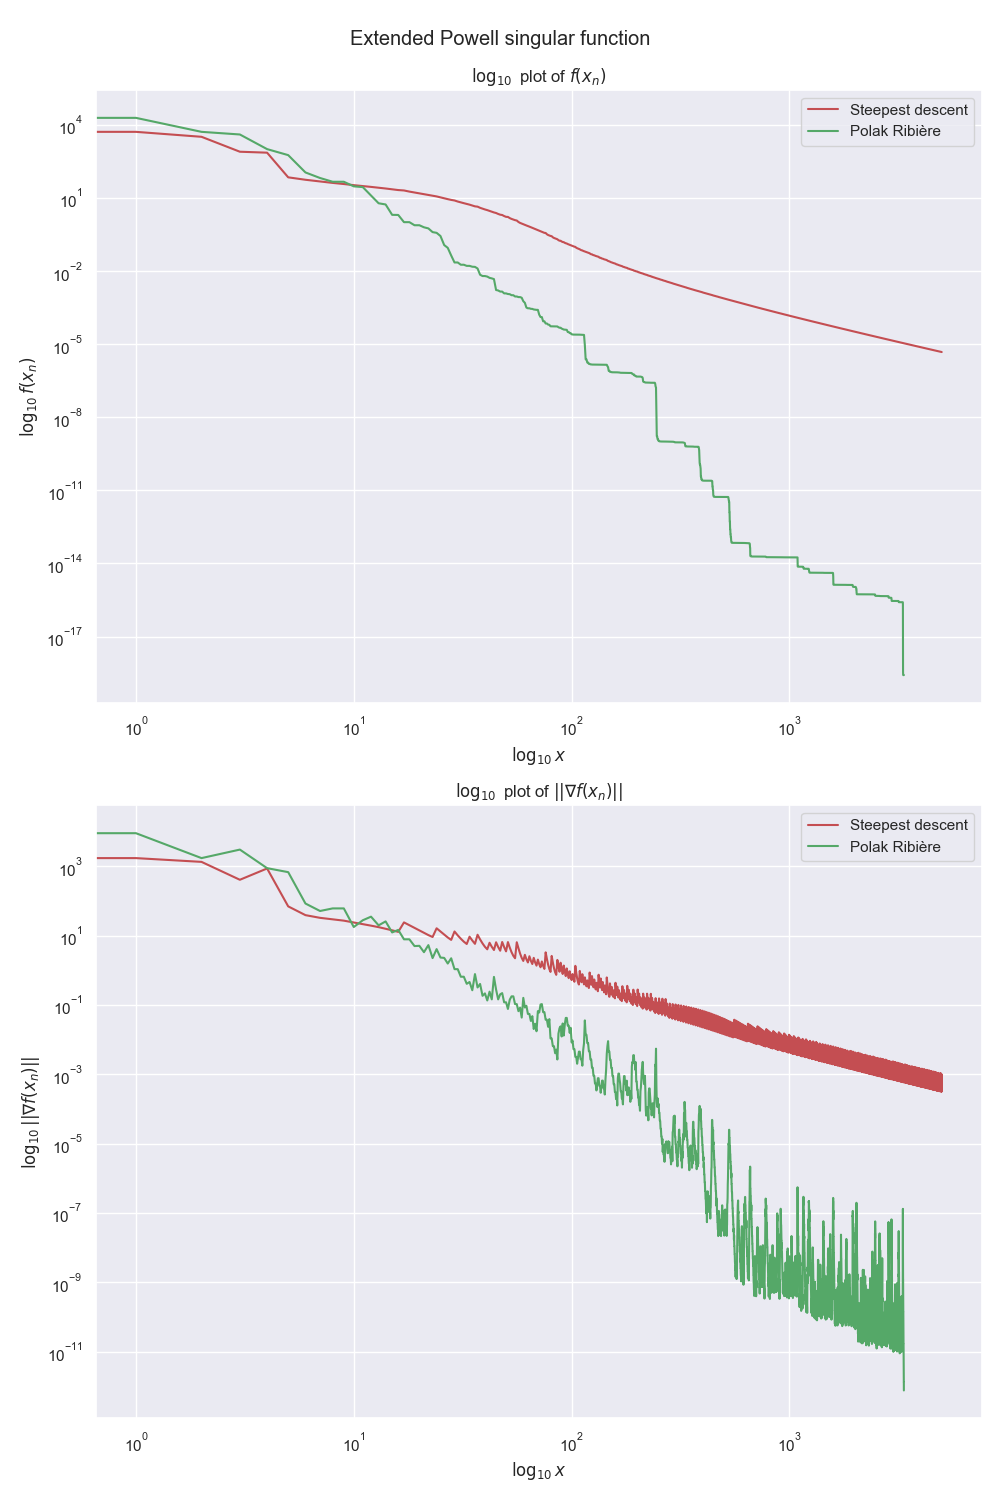

In [59]:
sns.set()
fig_ep, ax_ep = plt.subplots(2, 1, figsize=(10, 15))
ax_ep[0].plot(sd_fk_ep, '-r', label='Steepest descent')
ax_ep[0].plot(cg_fk_ep, '-g', label='Polak-Ribière')

ax_ep[0].set_xscale('log', base=10)
ax_ep[0].set_yscale('log', base=10)
ax_ep[0].set_xlabel(r'$\log_{10}{x}$')
ax_ep[0].set_ylabel(r'$\log_{10}{f({x_n})}$')
ax_ep[0].set_title(r'$\log_{10}$ plot of $f({x_n})$')

ax_ep[0].legend()

ax_ep[1].plot(sd_gradfk_norm_ep, '-r', label='Steepest descent')
ax_ep[1].plot(cg_gradfk_norm_ep, '-g', label='Polak-Ribière')

ax_ep[1].set_xscale('log', base=10)
ax_ep[1].set_yscale('log', base=10)
ax_ep[1].set_xlabel(r'$\log_{10}{x}$')
ax_ep[1].set_ylabel(r'$\log_{10}{||\nabla f({x_n})||}$')
ax_ep[1].set_title(r'$\log_{10}$ plot of $||\nabla f({x_n})||$')

ax_ep[1].legend()
fig_ep.tight_layout()
fig_ep.suptitle('Extended Powell singular function')
fig_ep.subplots_adjust(top=0.94)

2. Extended Rosenbrock

In [48]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    sd_xk_er, sd_fk_er, sd_gradfk_norm_er, sd_k_er, sd_x_seq_er, sd_bt_seq_er = steepest_descent_bcktrck(point, 'Extended Rosenbrock', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", sd_k_er)
    print("fk: ", sd_fk_er[-1]) 
    print("gradfk: ", sd_gradfk_norm_er[-1])
    print("\n")
    
    kmean += sd_k_er
    grad_norm_mean += sd_gradfk_norm_er[-1]
    if grad_norm_max < sd_gradfk_norm_er[-1]: 
        grad_norm_max = sd_gradfk_norm_er[-1]
    if grad_norm_min > sd_gradfk_norm_er[-1]: 
        grad_norm_min = sd_gradfk_norm_er[-1]
    fx_mean += sd_fk_er[-1]
    if fx_max < sd_fk_er[-1]: 
        fx_max = sd_fk_er[-1]
    if fx_min > sd_fk_er[-1]: 
        fx_min = sd_fk_er[-1]
    

Result of steepest descent method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  5000
fk:  13.305322719528064
gradfk:  4.172754887374995


Result of steepest descent method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  0.31217256628018625
gradfk:  0.26563611543299626


Result of steepest descent method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  5000
fk:  0.6697769528417546
gradfk:  0.5481241082183341


Result of steepest descent method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  0.5581507418175065
gradfk:  0.4287185003206401


Result of steepest descent method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  0.1287532306208373
gradfk:  0.30315450617661444


Result of steepest descent method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  5000
fk:  8.858234751936607
gradfk:  2.8028708737504653


Result of steepest descent method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  2.8604673124033635
gradfk:  1.118386464440305


Result of steepest descent method:
x0:  [9 1 4 2

In [49]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  5000.0


min_of_grad_norm:  0.0038664801741669502
mean_of_grad_norm:  1.1988138791539547
max_of_grad_norm:  4.172754887374995


min_of_fx:  4.3205839543652734e-06
mean_of_fx:  3.430108739636997
max_of_fx:  13.305322719528064


In [44]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    cg_xk_er, cg_fk_er, cg_gradfk_norm_er, cg_k_er, cg_x_seq_er, cg_bt_seq_er = cgm_pol_rib(point, 'Extended Rosenbrock', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of conjugate gradient method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", cg_k_er)
    print("fk: ", cg_fk_er[-1]) 
    print("gradfk: ", cg_gradfk_norm_er[-1])
    print("\n")
    
    kmean += cg_k_er
    grad_norm_mean += cg_gradfk_norm_er[-1]
    if grad_norm_max < cg_gradfk_norm_er[-1]: 
        grad_norm_max = cg_gradfk_norm_er[-1]
    if grad_norm_min > cg_gradfk_norm_er[-1]: 
        grad_norm_min = cg_gradfk_norm_er[-1]
    fx_mean += cg_fk_er[-1]
    if fx_max < cg_fk_er[-1]: 
        fx_max = cg_fk_er[-1]
    if fx_min > cg_fk_er[-1]: 
        fx_min = cg_fk_er[-1]
    

Result of conjugate gradient method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  2696
fk:  1.9154731616802238e-25
gradfk:  9.887072554797793e-13


Result of conjugate gradient method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  2.6810714832526413e-25
gradfk:  1.6239814455290883e-12


Result of conjugate gradient method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  3383
fk:  3.9470051421102766e-26
gradfk:  1.334934122286905e-13


Result of conjugate gradient method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  2.2151195729678545e-26
gradfk:  1.1773069470944867e-12


Result of conjugate gradient method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  1.3356801178654106e-25
gradfk:  2.0959330984264207e-12


Result of conjugate gradient method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  3324
fk:  2.5654792017725406e-26
gradfk:  1.0936254707663241e-13


Result of conjugate gradient method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  3.227594195130242e-26
gradfk:  1.0826

In [45]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  4089.2


min_of_grad_norm:  6.87134780005037e-14
mean_of_grad_norm:  7.466137148640839e-13
max_of_grad_norm:  2.0959330984264207e-12


min_of_fx:  5.011300530174698e-28
mean_of_fx:  7.56871652578999e-26
max_of_fx:  2.6810714832526413e-25


Text(0.5, 0.98, 'Extended Rosenbrock function')

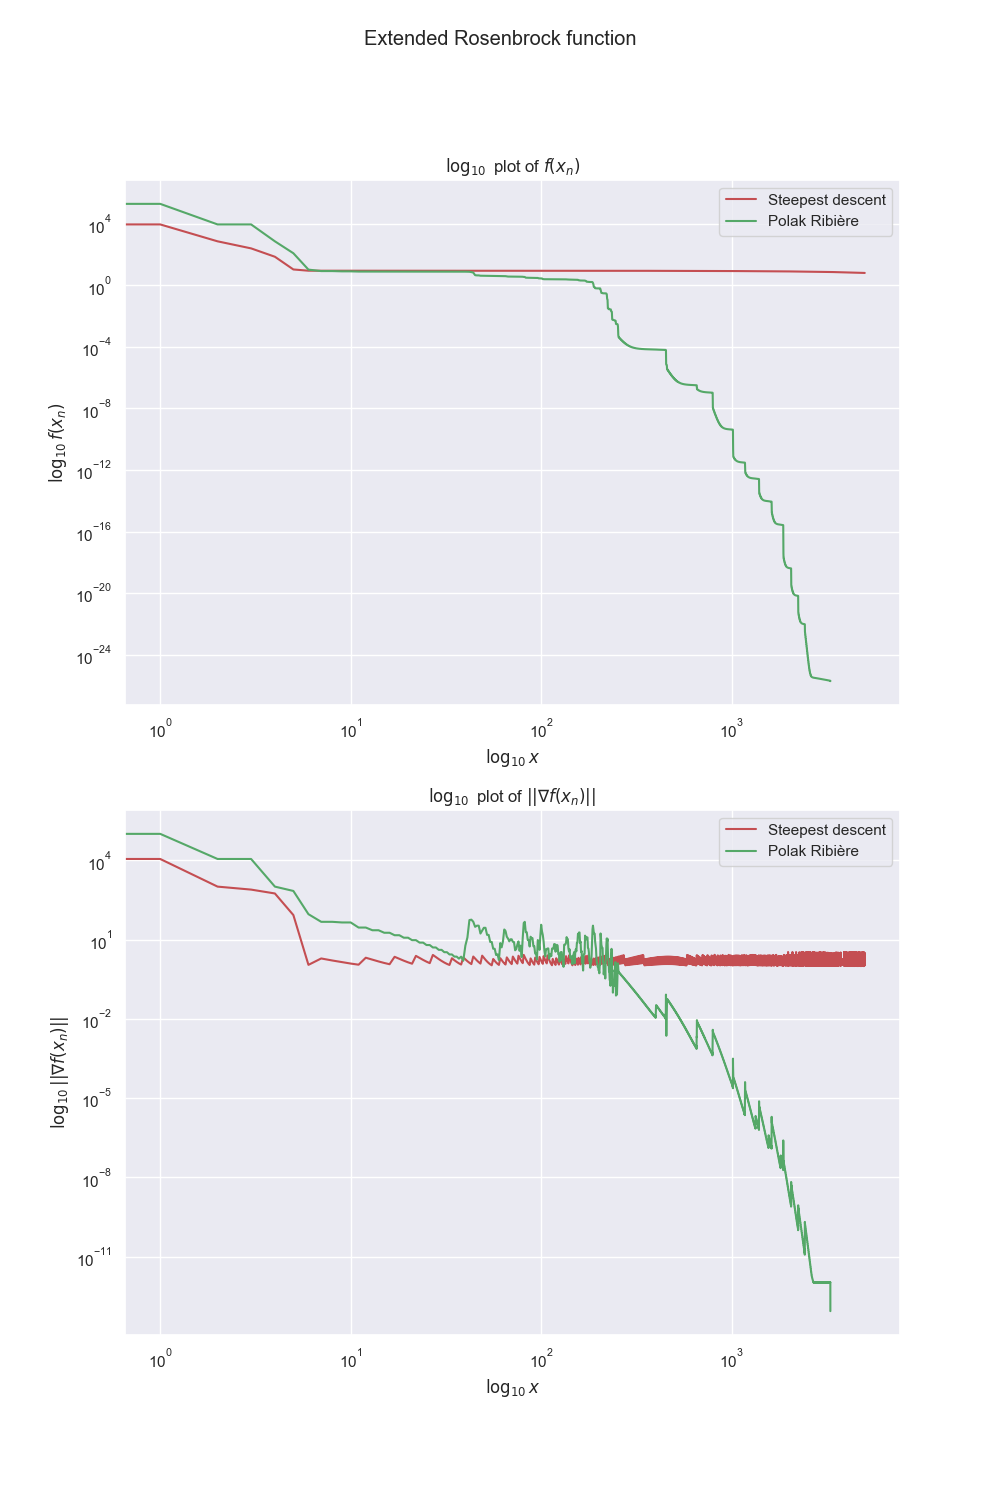

In [58]:
sns.set()
fig_er, ax_er = plt.subplots(2, 1, figsize=(10, 15))
ax_er[0].plot(sd_fk_er, '-r', label='Steepest descent')
ax_er[0].plot(cg_fk_er, '-g', label='Polak-Ribière')

ax_er[0].set_xscale('log', base=10)
ax_er[0].set_yscale('log', base=10)
ax_er[0].set_xlabel(r'$\log_{10}{x}$')
ax_er[0].set_ylabel(r'$\log_{10}{f({x_n})}$')
ax_er[0].set_title(r'$\log_{10}$ plot of $f({x_n})$')

ax_er[0].legend()

ax_er[1].plot(sd_gradfk_norm_er, '-r', label='Steepest descent')
ax_er[1].plot(cg_gradfk_norm_er, '-g', label='Polak-Ribière')

ax_er[1].set_xscale('log', base=10)
ax_er[1].set_yscale('log', base=10)
ax_er[1].set_xlabel(r'$\log_{10}{x}$')
ax_er[1].set_ylabel(r'$\log_{10}{||\nabla f({x_n})||}$')
ax_er[1].set_title(r'$\log_{10}$ plot of $||\nabla f({x_n})||$')

ax_er[1].legend()
fig_er.tight_layout()
fig_er.suptitle('Extended Rosenbrock function')
fig_er.subplots_adjust(top=0.94)

3. Banded Trigonometric

In [60]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    sd_xk_bt, sd_fk_bt, sd_gradfk_norm_bt, sd_k_bt, sd_x_seq_bt, sd_bt_seq_bt = steepest_descent_bcktrck(point, 'Banded Trigonometric', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", sd_k_bt)
    print("fk: ", sd_fk_bt[-1]) 
    print("gradfk: ", sd_gradfk_norm_bt[-1])
    print("\n")
    
    kmean += sd_k_bt
    grad_norm_mean += sd_gradfk_norm_bt[-1]
    if grad_norm_max < sd_gradfk_norm_bt[-1]: 
        grad_norm_max = sd_gradfk_norm_bt[-1]
    if grad_norm_min > sd_gradfk_norm_bt[-1]: 
        grad_norm_min = sd_gradfk_norm_bt[-1]
    fx_mean += sd_fk_bt[-1]
    if fx_max < sd_fk_bt[-1]: 
        fx_max = sd_fk_bt[-1]
    if fx_min > sd_fk_bt[-1]: 
        fx_min = sd_fk_bt[-1]

Result of steepest descent method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  2.2595870960379673e-10


Result of steepest descent method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  1.492020628795258e-08


Result of steepest descent method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  4.0587978488934416e-11


Result of steepest descent method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  -6.76215816219598
gradfk:  7.866348461583604e-09


Result of steepest descent method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  5.14351194626012e-08


Result of steepest descent method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  4106
fk:  -6.7621581621959805
gradfk:  9.989627606971748e-13


Result of steepest descent method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  -6.76215816219598
gradfk:  1.7879983297245196e-08


Result of steepest des

In [61]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  4910.6


min_of_grad_norm:  9.989627606971748e-13
mean_of_grad_norm:  1.4469297053005906e-08
max_of_grad_norm:  5.14351194626012e-08


min_of_fx:  -6.7621581621959805
mean_of_fx:  -6.7621581621959805
max_of_fx:  -1


In [62]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    cg_xk_bt, cg_fk_bt, cg_gradfk_norm_bt, cg_k_bt, cg_x_seq_bt, cg_bt_seq_bt = cgm_pol_rib(point, 'Banded Trigonometric', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", cg_k_bt)
    print("fk: ", cg_fk_bt[-1]) 
    print("gradfk: ", cg_gradfk_norm_bt[-1])
    print("\n")
    
    kmean += cg_k_bt
    grad_norm_mean += cg_gradfk_norm_bt[-1]
    if grad_norm_max < cg_gradfk_norm_bt[-1]: 
        grad_norm_max = cg_gradfk_norm_bt[-1]
    if grad_norm_min > cg_gradfk_norm_bt[-1]: 
        grad_norm_min = cg_gradfk_norm_bt[-1]
    fx_mean += cg_fk_bt[-1]
    if fx_max < cg_fk_bt[-1]: 
        fx_max = cg_fk_bt[-1]
    if fx_min > cg_fk_bt[-1]: 
        fx_min = cg_fk_bt[-1]

Result of steepest descent method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  1.382575613525738e-07


Result of steepest descent method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  2.0490143041315332e-08


Result of steepest descent method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  2.100680635059004e-08


Result of steepest descent method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  -6.762158162195981
gradfk:  8.549057716609627e-08


Result of steepest descent method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  5.72174094198937e-08


Result of steepest descent method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  4.0423718976769385e-08


Result of steepest descent method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  -6.762158162195981
gradfk:  6.247227580993808e-08


Result of steepest de

In [63]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  5000.0


min_of_grad_norm:  2.0490143041315332e-08
mean_of_grad_norm:  5.719924266828129e-08
max_of_grad_norm:  1.382575613525738e-07


min_of_fx:  -6.762158162195981
mean_of_fx:  -6.7621581621959805
max_of_fx:  -1


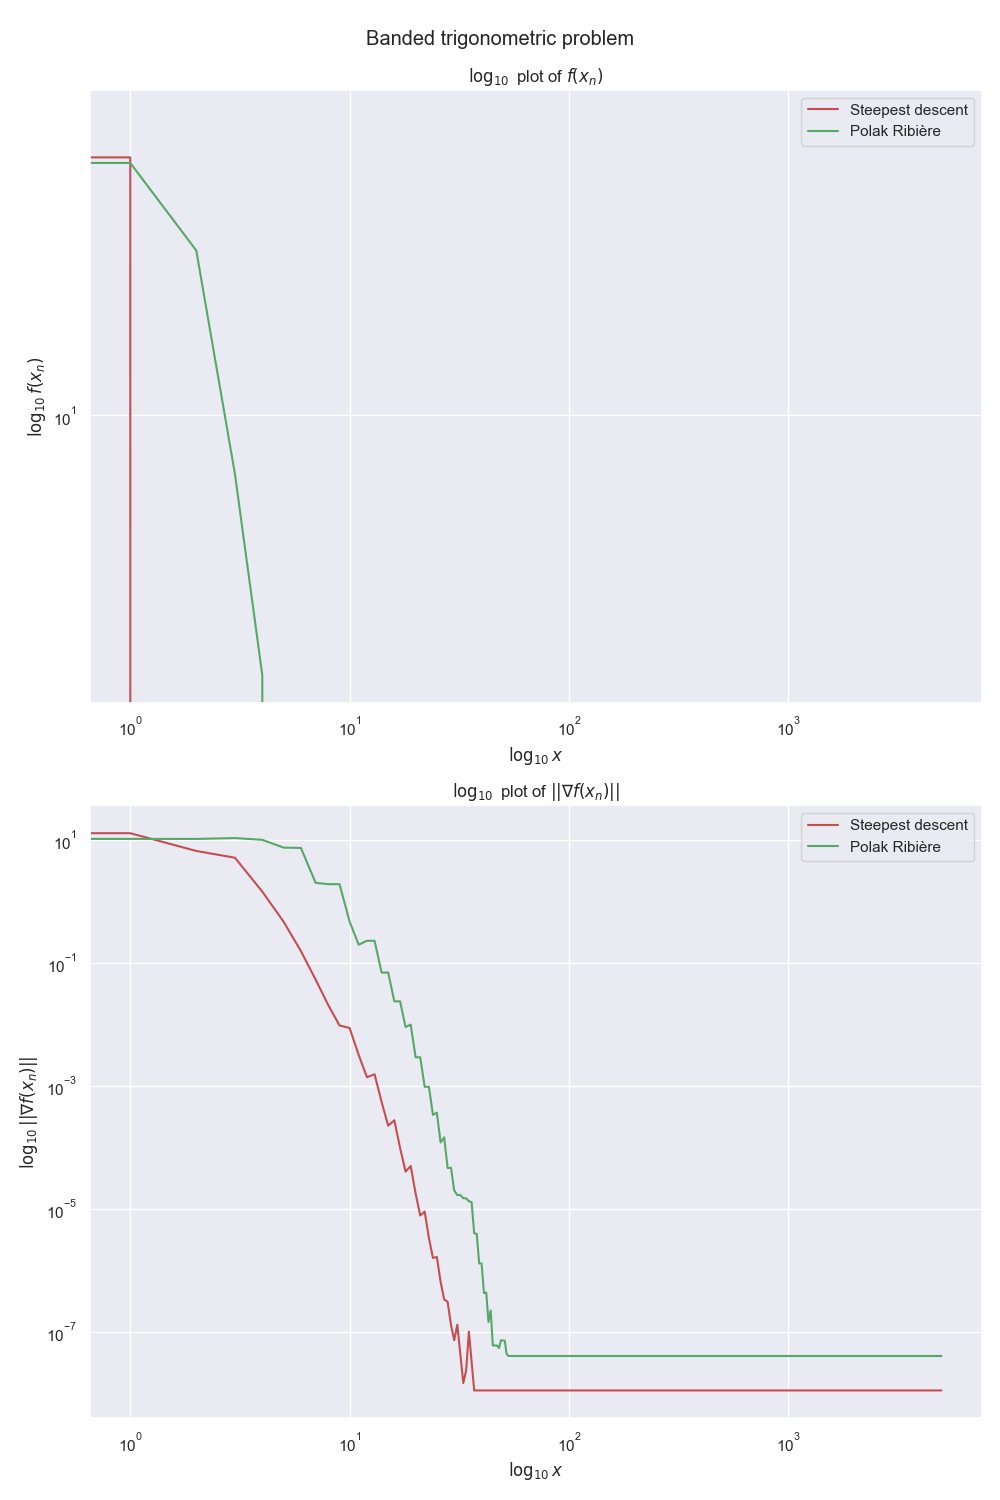

In [64]:
sns.set()
fig_bt, ax_bt = plt.subplots(2, 1, figsize=(10, 15))
ax_bt[0].plot(sd_fk_bt, '-r', label='Steepest descent')
ax_bt[0].plot(cg_fk_bt, '-g', label='Polak-Ribière')

ax_bt[0].set_xscale('log', base=10)
ax_bt[0].set_yscale('log', base=10)
ax_bt[0].set_xlabel(r'$\log_{10}{x}$')
ax_bt[0].set_ylabel(r'$\log_{10}{f({x_n})}$')
ax_bt[0].set_title(r'$\log_{10}$ plot of $f({x_n})$')

ax_bt[0].legend()

ax_bt[1].plot(sd_gradfk_norm_bt, '-r', label='Steepest descent')
ax_bt[1].plot(cg_gradfk_norm_bt, '-g', label='Polak-Ribière')

ax_bt[1].set_xscale('log', base=10)
ax_bt[1].set_yscale('log', base=10)
ax_bt[1].set_xlabel(r'$\log_{10}{x}$')
ax_bt[1].set_ylabel(r'$\log_{10}{||\nabla f({x_n})||}$')
ax_bt[1].set_title(r'$\log_{10}$ plot of $||\nabla f({x_n})||$')

ax_bt[1].legend()
fig_bt.tight_layout()
fig_bt.suptitle('Banded trigonometric problem')
fig_bt.subplots_adjust(top=0.94)